In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [10]:
#import data 
from tensorflow.keras.datasets import fashion_mnist

In [11]:
(X_train,y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
#check image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

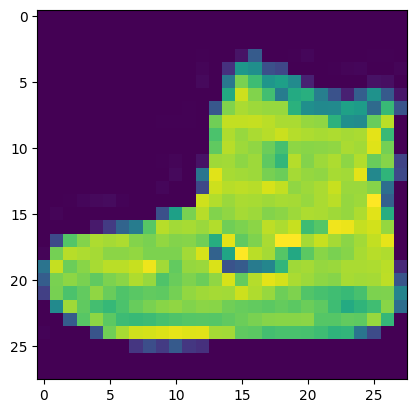

In [14]:
#view image
plt.imshow(X_train[0])

In [15]:
X_train = X_train.reshape(60000,28,28,1)

In [16]:
X_test = X_test.reshape(10000,28,28,1)

In [17]:
X_train.max(), X_train.min()

(255, 0)

In [18]:
#scaling
X_train = X_train/255

In [19]:
X_test = X_test/255

In [20]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [21]:
#label
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
y_train_cat = tf.keras.utils.to_categorical(y_train)

In [24]:
y_train[0]

9

In [25]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [26]:
# CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

In [28]:
#CNN
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())


In [29]:
#ANN
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [34]:
model.fit(X_train, y_train_cat, epochs=2, verbose=1)

Epoch 1/2
1875/1875 [==============================] - 81s 41ms/step - loss: 0.3792 - accuracy: 0.8653
Epoch 2/2
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2561 - accuracy: 0.9058


In [35]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [36]:
y_pred_cat = np.argmax(y_pred, axis=1)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.78      0.83      1000
           3       0.92      0.88      0.90      1000
           4       0.79      0.90      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.67      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



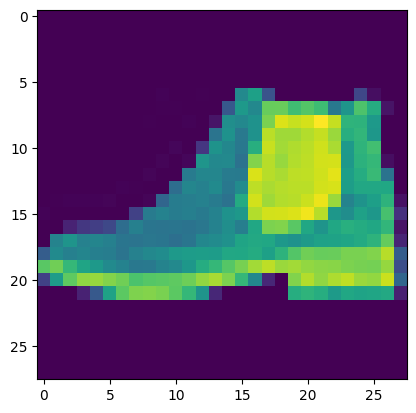

In [53]:
#check visually
plt.imshow(X_test[186])

In [ ]:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [54]:
y_pred_cat[186]

9